In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [2]:
def brownian_motion_plot(steps = 100, lmbd = 0.3, mu = 0.3):
    x = np.zeros(steps)
    for i in range(1, steps):
        prob = np.random.random()
        if prob < lmbd:
            x[i] = x[i-1] + 1
        elif prob > 1 - mu:
            x[i] = x[i-1] - 1
        else:
            x[i] = x[i-1]
    plt.figure(figsize = (13, 8))
    plt.plot(x, range(len(x)), label = 'Траектория', color = 'orange')
    plt.xlabel('Номер узла')
    plt.ylabel('Номер шага')
    plt.legend()
    plt.grid()
    plt.show()

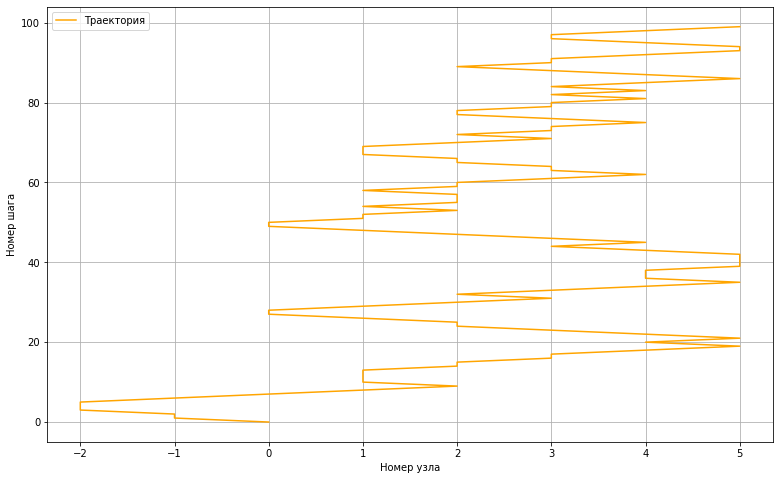

In [3]:
brownian_motion_plot(steps = 100, lmbd = 0.3, mu = 0.3)

In [4]:
@jit(nopython = True)
def brownian_motion_pnt(steps = 1000, realizations = 100000, lmbd = 0.3, mu = 0.3):
    x = np.zeros((realizations, steps))
    for realization in range(realizations):
        for i in range(1, steps):
            prob = np.random.random()
            if prob < lmbd:
                x[realization, i] = x[realization, i-1] + 1
            elif prob > 1 - mu:
                x[realization, i] = x[realization, i-1] - 1
            else:
                x[realization, i] = x[realization, i-1]
    return x

In [5]:
x = brownian_motion_pnt(steps = 1000, realizations = 100000, lmbd = 0.3, mu = 0.3)

In [20]:
def plot_bm(n_0 = None, t_0 = None, lmbd = 0.3, mu = 0.3, realisations = 100000):
    def p_analytical(n, t):
        return np.exp(-(n + (mu - lmbd)* t)**2 / (2 * (mu + lmbd) * t)) / np.sqrt(2 * (mu + lmbd)*t)
    if n_0 == None:
        plt.figure(figsize = (13, 8))
        x = brownian_motion_pnt(steps = t_0 + 1, realizations = realisations, lmbd = lmbd, mu = mu)
        p = x[:, t_0]
        unique, counts = np.unique(p, return_counts=True)
        n_a = np.linspace(unique.min(), unique.max(), 100000)
        plt.plot(n_a, p_analytical(n_a, t_0), label = 'Аналитическая вероятность при $t = t_0$')
        plt.plot(unique, counts / len(p), label = r'Вероятность при $t = t_0$')
        plt.xlabel('Номер узла')
        plt.ylabel('Вероятность')
        plt.legend()
        plt.grid()
        plt.show()
    if t_0 == None:
        plt.figure(figsize = (13, 8))
        x = brownian_motion_pnt(steps = 1000, realizations = 100000, lmbd = 0.3, mu = 0.3)
        p = np.sum(np.array([x == 0]).reshape(100000, 1000), axis = 0) / (x.shape[0])
        t = np.linspace(0, 1000, 100000)
        plt.plot(t, p_analytical(n_0, t), label = 'Аналитическая вероятность при $n = n_0$')
        plt.plot(p, label = r'Численная вероятность при $n = n_0$')
        plt.xlabel('Время')
        plt.ylabel('Вероятность')
        plt.legend()
        plt.grid()
        plt.show()

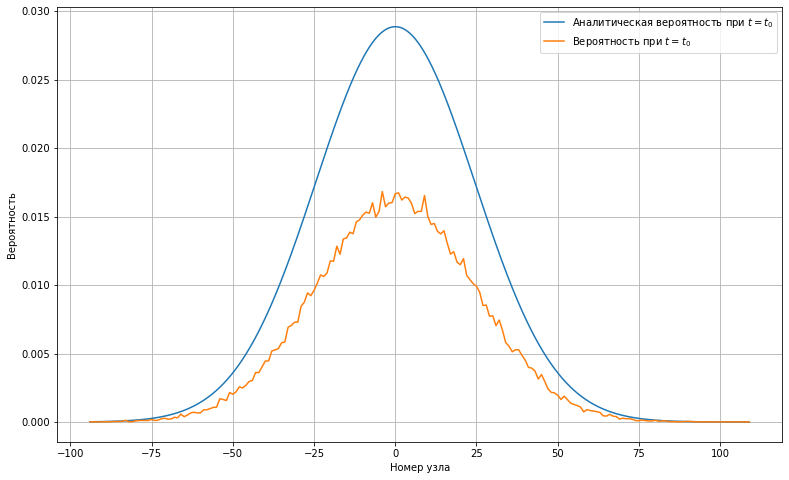

In [21]:
plot_bm(t_0 = 1000, lmbd = 0.3, mu = 0.3)

К сожалению не остается времени разобраться где ошибка, видимо какой-то коэффициент потерян